In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [3]:
df.shape

(14619, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [5]:
# 
stats=df['Price'].describe().reset_index()
stats['Price']=round(stats['Price'],2)

In [6]:
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [7]:
# checking for null values 
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [8]:
# searching for asny duplicated values 
df.duplicated().sum()


0

In [9]:
# for na values 
df.dropna(inplace=True)
# for duplicated values 
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [11]:
stats1=df['grade of the house'].describe().reset_index()
stats1['grade of the house ']=round(stats1['grade of the house'],2)
stats1

,index,grade of the house,grade of the house
0,count,14619.000000,14619.00
1,mean,7.682263,7.68
2,std,1.174917,1.17
3,min,4.000000,4.00
4,25%,7.000000,7.00
5,50%,7.000000,7.00
6,75%,8.000000,8.00
7,max,13.000000,13.00


In [12]:
df.groupby("grade of the house")['Price'].mean().sort_values(ascending=False)

grade of the house
13    4.100000e+06
12    2.153545e+06
11    1.491944e+06
10    1.056720e+06
9     7.655474e+05
8     5.394682e+05
7     3.974866e+05
6     2.949896e+05
5     2.361458e+05
4     2.145882e+05
Name: Price, dtype: float64

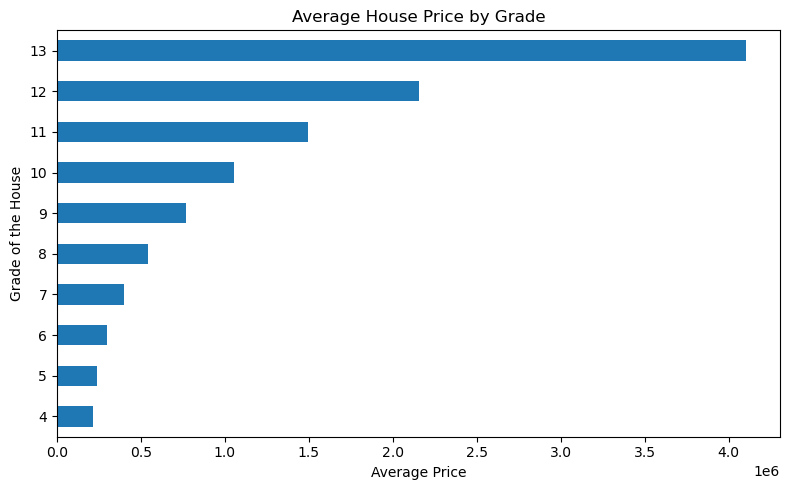

In [13]:


df.groupby("grade of the house")['Price'].mean().sort_values().plot(kind='barh', figsize=(8, 5))
plt.xlabel("Average Price")
plt.ylabel("Grade of the House")
plt.title("Average House Price by Grade")
plt.tight_layout()
plt.show()


In [14]:
df.groupby("condition of the house")['Price'].mean().sort_values(ascending=False)
# as the condition number increases the price of the house also increases 


condition of the house
5    609954.024276
3    539336.477968
4    521082.494579
2    312891.400000
1    285497.222222
Name: Price, dtype: float64

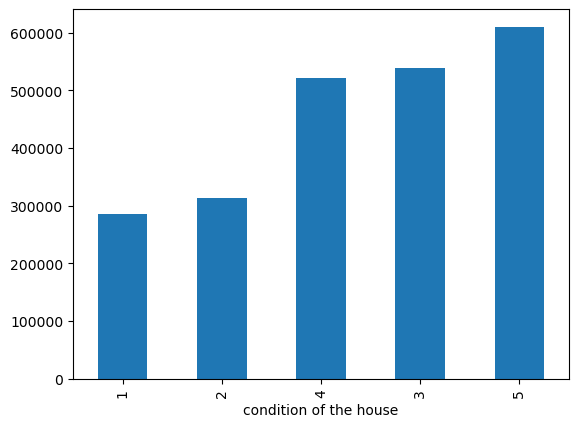

In [15]:
# plotting the condition of the house with respect to price 
df.groupby("condition of the house")['Price'].mean().sort_values(ascending=True).plot(kind='bar')
plt.show()


In [16]:

corr_matrix = df.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                                    1.000000
living area                              0.712276
grade of the house                       0.671805
Area of the house(excluding basement)    0.615179
living_area_renov                        0.585021
number of bathrooms                      0.532031
number of views                          0.394954
Area of the basement                     0.330499
number of bedrooms                       0.308165
Lattitude                                0.297570
waterfront present                       0.263943
number of floors                         0.262649
Renovation Year                          0.133362
lot area                                 0.082117
lot_area_renov                           0.075697
Built Year                               0.050936
condition of the house                   0.040609
Longitude                                0.024807
Number of schools nearby                 0.009904
Distance from the airport                0.004074


In [17]:
df['living area'].mean

<bound method Series.mean of 0        2920
1        2910
2        3310
3        2710
4        2600
         ... 
14614    1556
14615    1680
14616    1070
14617    1030
14618     900
Name: living area, Length: 14619, dtype: int64>

In [18]:
# removing unwanted columns
df = df.drop(columns=[
    'id', 
    'Date', 
    'Postal Code', 
    'Area of the house(excluding basement)',
    'Area of the basement',
    'Built Year',
    'Renovation Year',
    'Lattitude',
    'Longitude',
    'living_area_renov',
    'lot_area_renov',
    'lot area',
    'number of floors',
    'waterfront present',
    'Distance from the airport'	
    
])




In [19]:
df.head()


,number of bedrooms,number of bathrooms,living area,number of views,condition of the house,grade of the house,Number of schools nearby,Price
0,4,2.50,2920,0,5,8,2,1400000
1,5,2.75,2910,0,3,8,1,1200000
2,4,2.50,3310,0,3,9,3,838000
3,3,2.00,2710,0,4,8,1,805000
4,3,2.50,2600,0,4,9,1,790000


In [20]:
# BUILDING MODEL 
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'number of views', 'condition of the house', 'grade of the house',
       'Number of schools nearby', 'Price'],
      dtype='object')

In [21]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 1: Select Features
features = ['number of bedrooms', 'number of bathrooms', 'grade of the house',
            'living area', 'condition of the house', 'Number of schools nearby']
x = df[features]
y = df['Price'].values.reshape(-1, 1)

# Step 2: Scale Features
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# Step 3: VIF Calculation
x_scaled_df = pd.DataFrame(x_scaled, columns=features)

vif_data = pd.DataFrame()
vif_data["Feature"] = x_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled_df.values, i) for i in range(x_scaled_df.shape[1])]

print("VIF for each feature:")
print(vif_data)


VIF for each feature:
                    Feature       VIF
0        number of bedrooms  1.581010
1       number of bathrooms  2.534090
2        grade of the house  2.626592
3               living area  3.784876
4    condition of the house  1.045163
5  Number of schools nearby  1.000065


In [22]:
#1–5 = Acceptable

# > 5 = Moderate collinearity

# > 10 = Serious multicollinearity → remove or combine features



In [23]:
df.shape[0]*0.8

11695.2

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(11695, 6)

In [26]:
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)
rmse=root_mean_squared_error(y_test,y_pred)
print('RMSE',rmse)

RMSE 0.6724139032786098


# Trying another model 

In [30]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

C:\Users\mp599\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [31]:
y_pred1=model1.predict(x_test)
rmse2=root_mean_squared_error(y_test,y_pred1)
print('RMSE RANDOMFOREST:',rmse2)


RMSE RANDOMFOREST: 0.6697529105696387


# Trying another model 

In [33]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)


DecisionTreeRegressor()

In [34]:
from sklearn.metrics import root_mean_squared_error
y_pred2=model2.predict(x_test)
rmse=root_mean_squared_error(y_test,y_pred2)
print(rmse)

0.8835633579324356


In [35]:
# RandomForest has lowest rmse so we select linear  

In [36]:
model1

RandomForestRegressor()

In [37]:
import joblib


# Save model 
joblib.dump(model, 'india_house_price.pkl')
joblib.dump(x_scaler, 'scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')

['y_scaler.pkl']